# Input data generator
- Generate input to `trigger_test` test bench

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Phase input

In [10]:
RANDOM_SEED = 0
NOISE_SIGMA = 0.1 # radian
LENGTH_PRE = 100
LENGTH_TOT = 1024
N_CH = 16

rs = np.random.RandomState(RANDOM_SEED)

data = rs.normal(scale=NOISE_SIGMA, size=(LENGTH_TOT, N_CH))

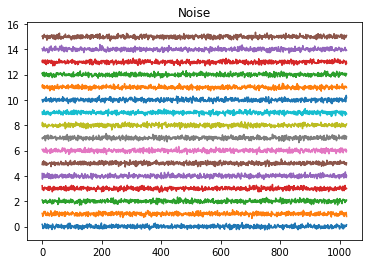

In [13]:
plt.title('Noise')
for channel in range(N_CH):
    plt.plot(data[:,channel] + channel)

### Pulse injection

In [21]:
PULSE_HEIGHT = 1.
PULSE_TAU = 10.

pulse_pre = np.zeros(LENGTH_PRE, dtype=np.float64)
pulse_post = PULSE_HEIGHT*np.exp(-np.arange(LENGTH_TOT - LENGTH_PRE)/PULSE_TAU)
pulse = np.concatenate([pulse_pre, pulse_post])

In [22]:
PULSE_CH = 3

data[:,PULSE_CH] += pulse

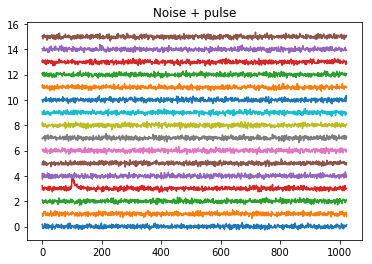

In [23]:
plt.title('Noise + pulse')
for channel in range(N_CH):
    plt.plot(data[:,channel] + channel)

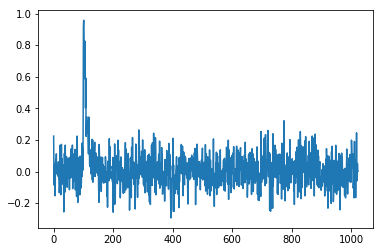

In [24]:
plt.plot(data[:,3])

### File

In [45]:
data_f = data.ravel()
data_b = data_f.tobytes()
with open('tb_phase.dat', 'wb') as f_ph:
    f_ph.write(data_b)

## Data input

- First 48 bit: channel
- Second 48 bit: data #

In [49]:
with open('tb_data.dat', 'wb') as f_data:
    for index in range(LENGTH_TOT):
        for channel in range(N_CH):
            f_data.write(channel.to_bytes(6, byteorder='little'))
            f_data.write(index.to_bytes(6, byteorder='little'))